# Different data resolutions

This example is about different input data resolutions.

```{glue:} different_resolutions
```

Neuroimaging data on cortical surface has different spatial resolutions:

| name | resolution | # of vertices per hemishere |
| --- | --- | --- |
| icoorder7 | 0.7 mm | 163842 |
| icoorder6 | 1.5 mm | 40962 |
| icoorder5 | 3 mm | 10242 |
| icoorder4 | 6 mm | 2562 |
| icoorder3 | 13 mm | 642 |

Typical the data resolution is between `icoorder7` (usually anatomical scans) and `icoorder5` (usually functional scans). `icoorder3` resolution is often used in defining connectivity targets for [connectivity hyperalignment](https://doi.org/10.1371/journal.pcbi.1006120) and in examples.

The number of cortical vertices **per hemisphere** can be computed based on icoorder: $ n_v = 4^{icoorder} \times 10 + 2 $, where $n_v$ is the number of vertices.

The `brain_plot` function automatically handles various data resolution between `icoorder7` and `icoorder3`. When the input data has a lower resolution than `icoorder7`, it's automatically upsampled to the `icoorder7` resolution in a nearest-neighbor manner based on the [Voronoi diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). The data is always visualized using the `icoorder7` high-resolution surface (i.e., `fsaverage`).

In [1]:
import numpy as np
from brainplotlib import brain_plot
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)

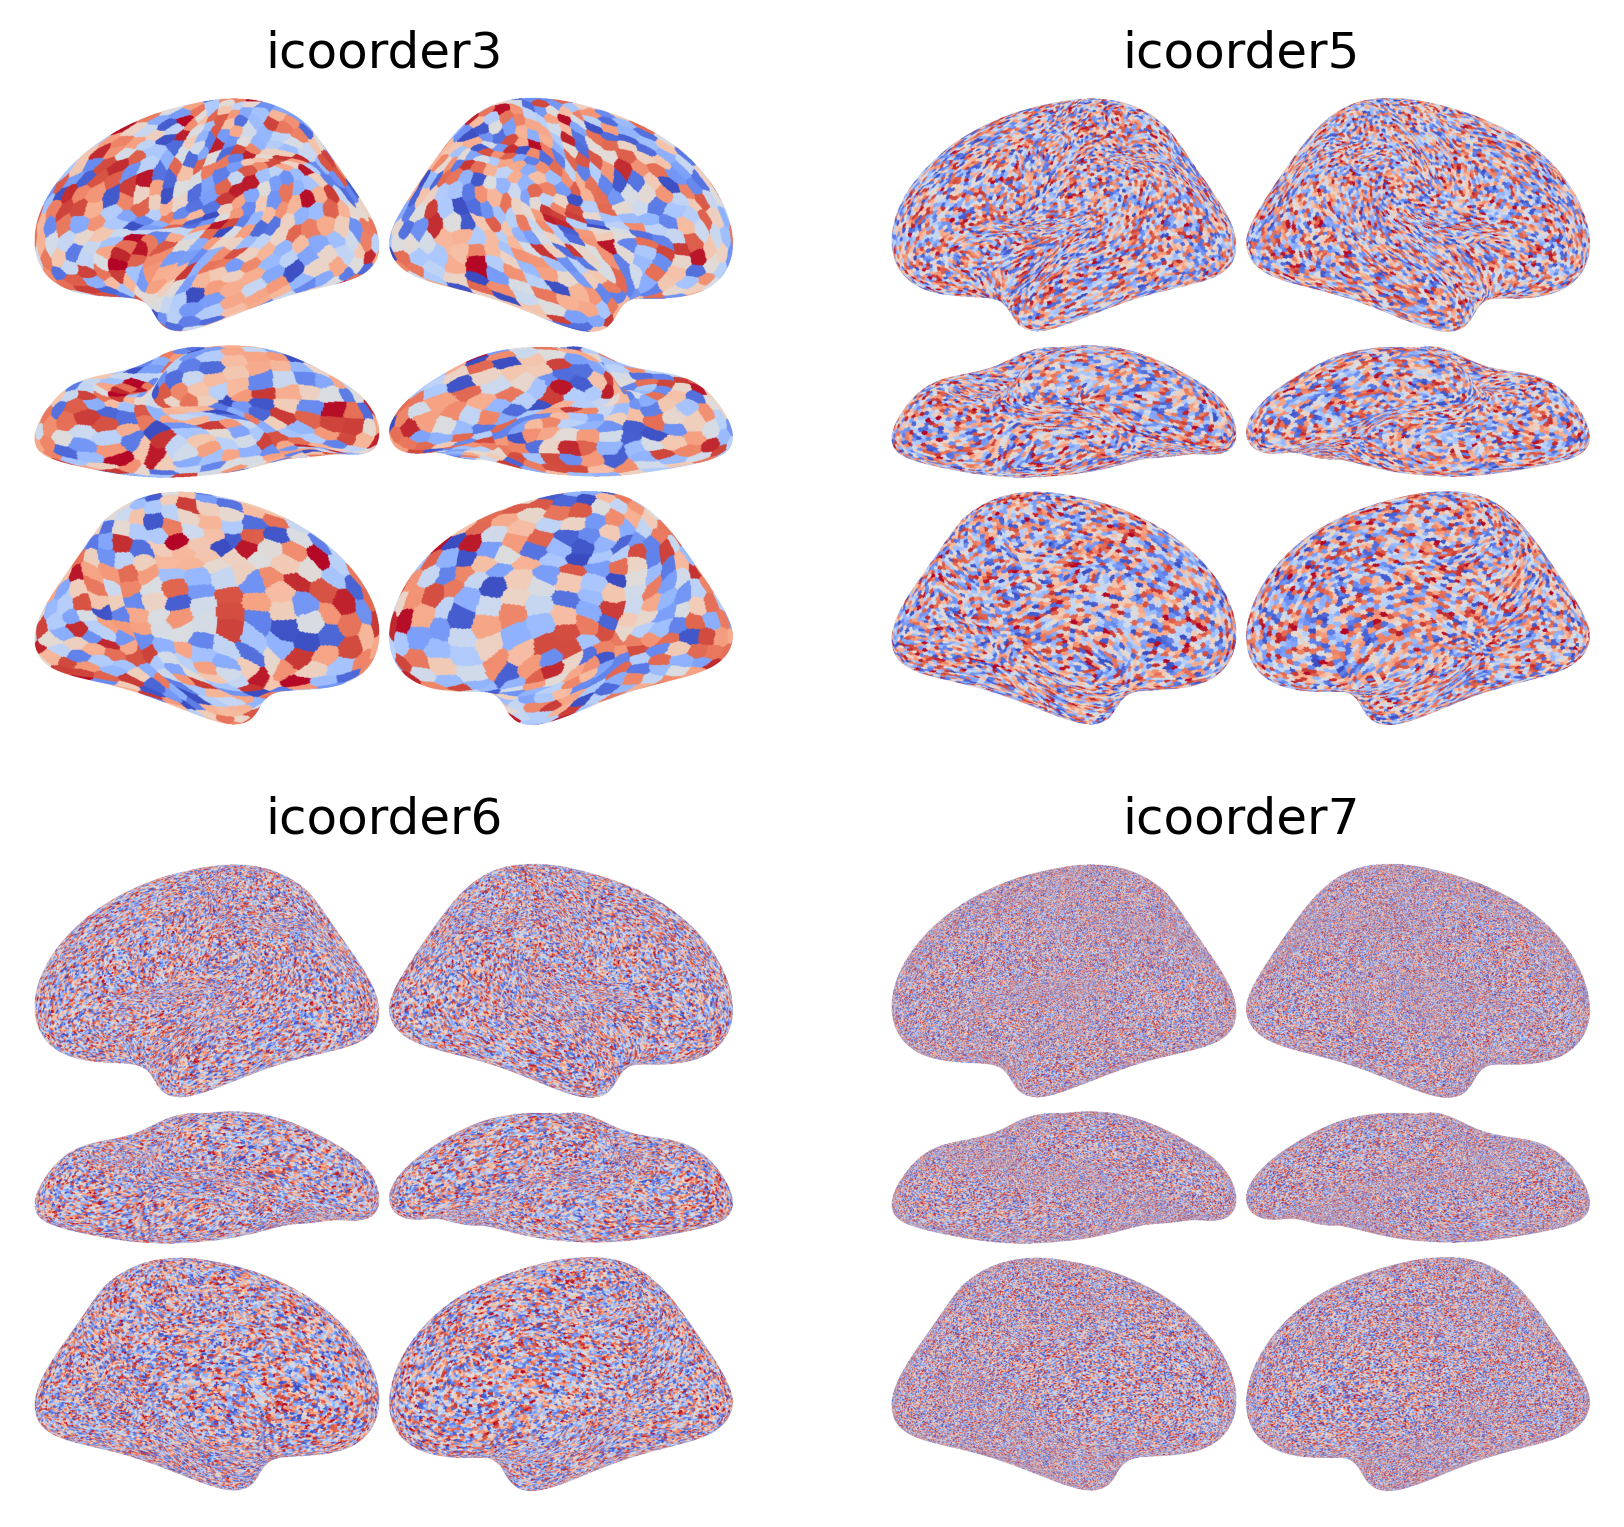

In [2]:
fig, axs = plt.subplots(2, 2, dpi=300, figsize=([_/300 + 1 for _ in [1728, 1560]]))
icoorders = [3, 5, 6, 7]
for i in range(2):
    for j in range(2):
        ax = axs[i][j]
        icoorder = icoorders[i*2+j]
        nv = 4**icoorder * 10 + 2
        v = rng.random((nv * 2, ))
        img = brain_plot(v, vmax=1, vmin=0, cmap='coolwarm')
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'icoorder{icoorder}')
plt.show()

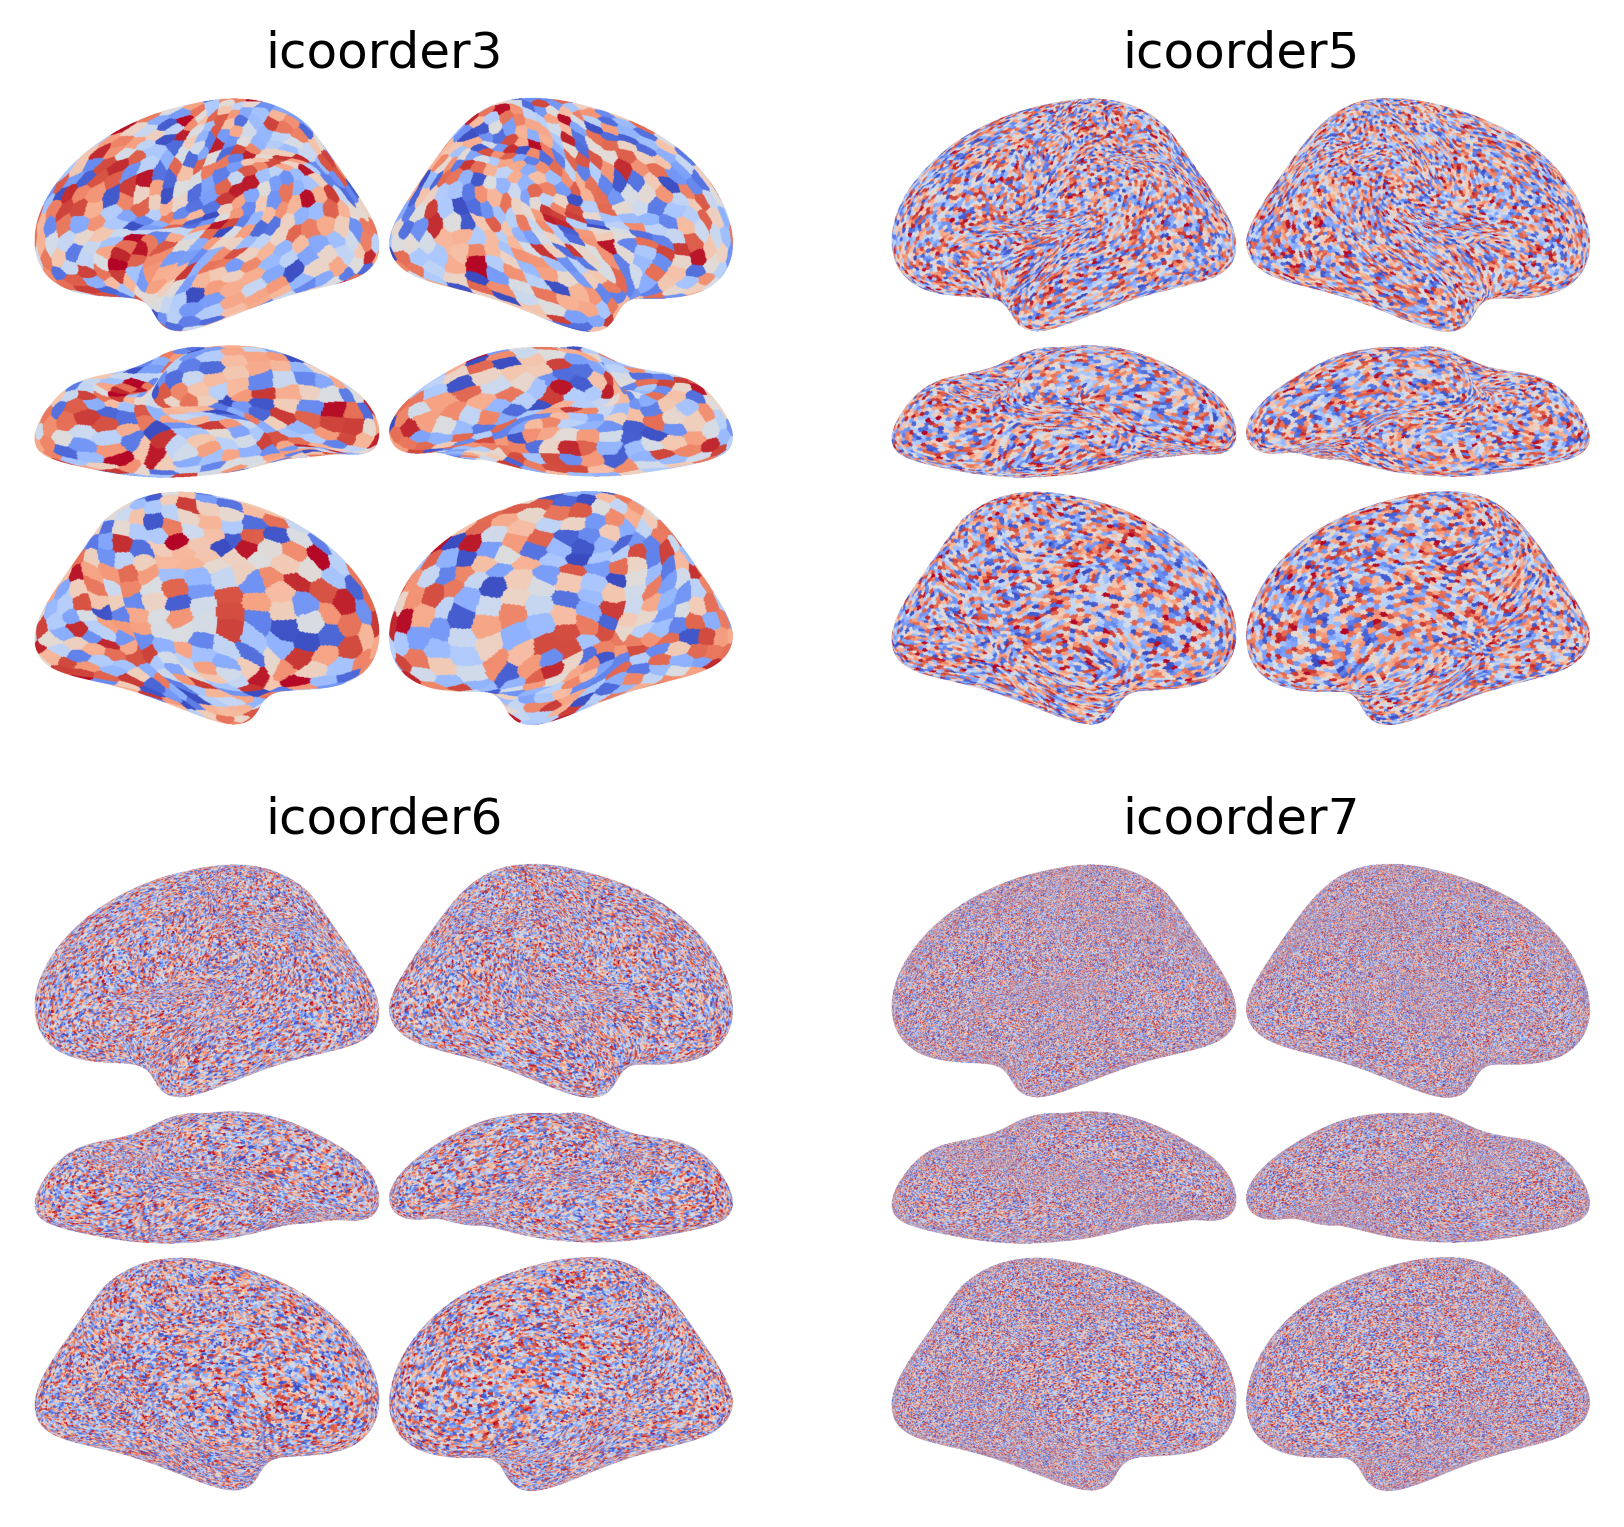

In [3]:
from myst_nb import glue
glue('different_resolutions', fig, display=False)

{{ gallery_link }}